# 3.11 Guia - Regressão Logistica

#### Importando as Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importando os dados

In [2]:
base_dados = pd.read_excel('BaseDados_RegressaoLogistica.xlsx','Plan1')
base_dados

,Id Cliente,Renda,Tipo Renda,Possui Imóvel,Comprou?
0,1,10480,1,2,1
1,2,6182,2,2,1
2,3,6387,3,1,0
3,4,6528,1,2,0
4,5,8269,1,2,0
...,...,...,...,...,...
95,96,3238,1,2,0
96,97,10701,1,2,1
97,98,14732,1,2,0
98,99,4790,1,2,1


In [3]:
base_dados.tail()

,Id Cliente,Renda,Tipo Renda,Possui Imóvel,Comprou?
95,96,3238,1,2,0
96,97,10701,1,2,1
97,98,14732,1,2,0
98,99,4790,1,2,1
99,100,14026,2,2,1


In [8]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id Cliente     100 non-null    int64
 1   Renda          100 non-null    int64
 2   Tipo Renda     100 non-null    int64
 3   Possui Imóvel  100 non-null    int64
 4   Comprou?       100 non-null    int64
dtypes: int64(5)
memory usage: 4.0 KB


In [4]:
base_dados.describe()

,Id Cliente,Renda,Tipo Renda,Possui Imóvel,Comprou?
count,100.000000,100.00000,100.000000,100.00000,100.000000
mean,50.500000,8520.77000,1.400000,1.85000,0.640000
std,29.011492,4039.01965,0.710669,0.35887,0.482418
min,1.000000,1643.00000,1.000000,1.00000,0.000000
25%,25.750000,5455.25000,1.000000,2.00000,0.000000
50%,50.500000,8824.00000,1.000000,2.00000,1.000000
75%,75.250000,12036.00000,2.000000,2.00000,1.000000
max,100.000000,14994.00000,3.000000,2.00000,1.000000


#### EDA

In [14]:
# configurar a visualização
#%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#configurando parâmetros das fontes
plt.rcParams['font.family'] = 'sans-serif'

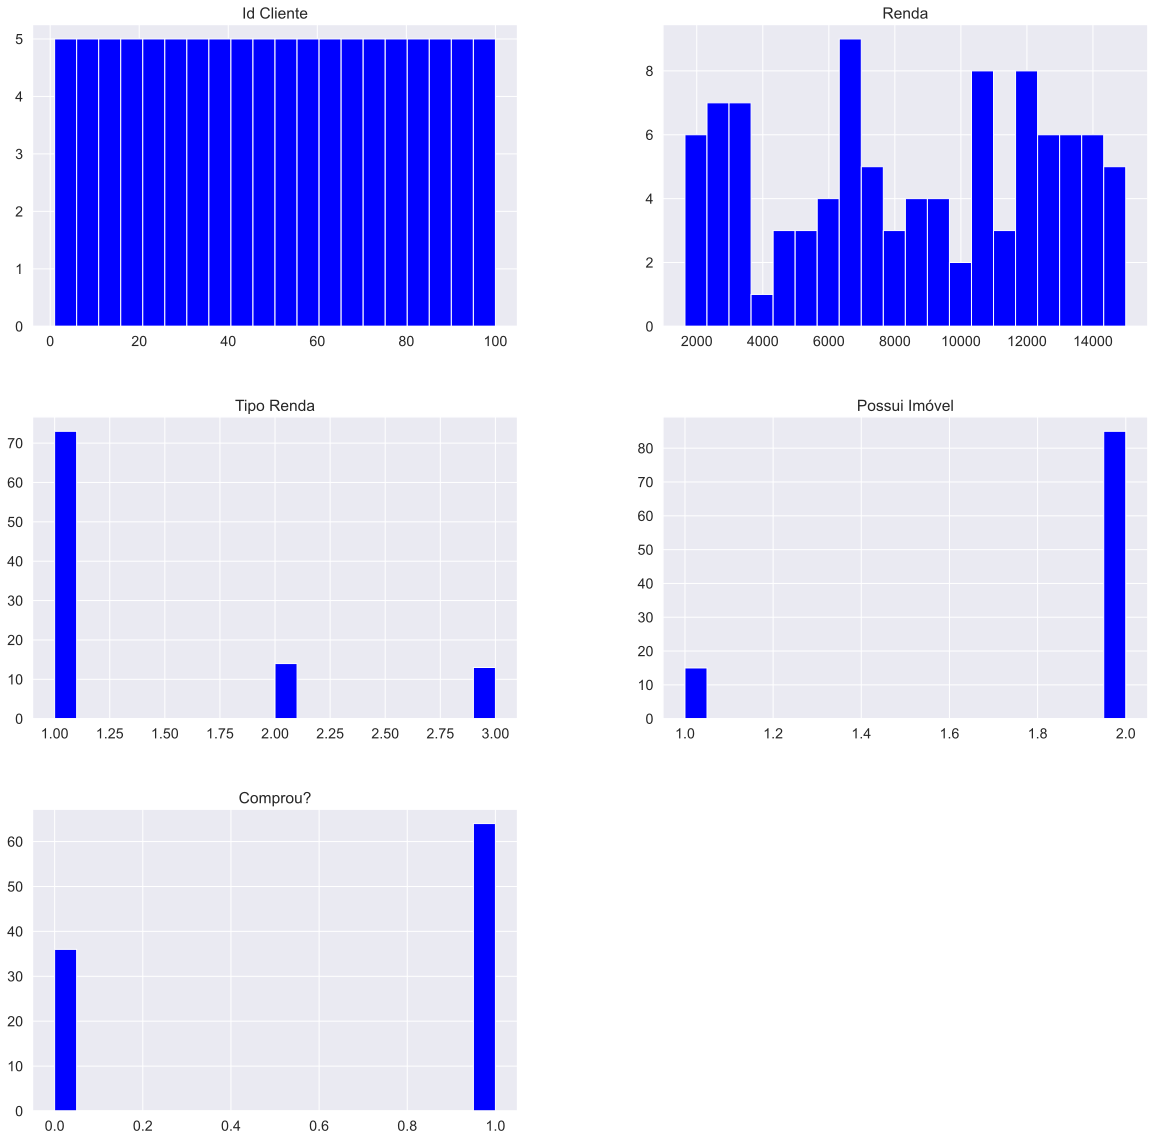

In [15]:
sns.set(font_scale=1.3,rc={'figure.figsize':(20,20)})
eixo=base_dados.hist(bins=20,color='blue')

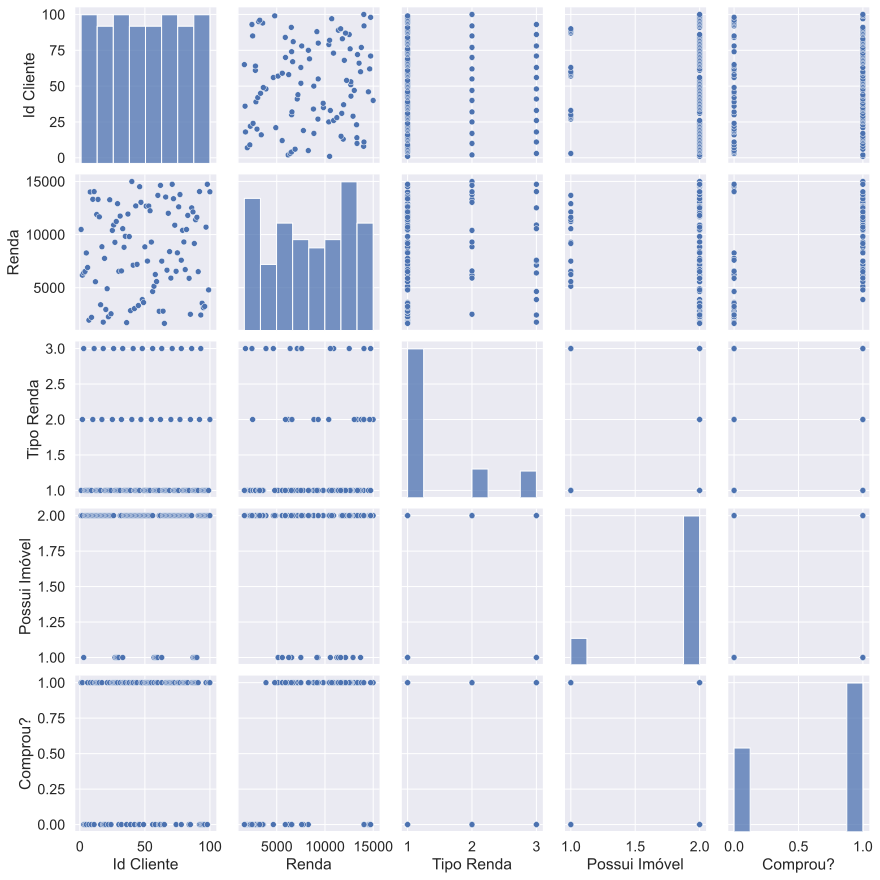

In [16]:
sns.pairplot(base_dados)

Text(0, 16000, 'Boxplot de Renda x Tipo de Renda')

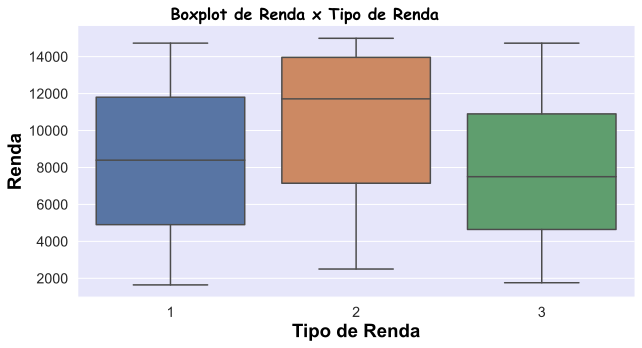

In [19]:
plt.figure(figsize=(10,5),
           facecolor='white') # Ajustando a cor

ax = plt.axes()
ax.set_facecolor('#E6E6FA') #Cor de fundo do gráfico
ax.spines['right'].set_visible(False) # Remover grids e eixos
ax.spines['top'].set_visible(False) # Remover grids e eixos

sns.boxplot(data=base_dados,x='Tipo Renda',y='Renda')

# Definindo label do eixo X
plt.xlabel(
        'Tipo de Renda', # Nome do Label
        fontweight='bold', # Estilo
        fontsize='large', # Tamanho da Fonte
        color = 'Black' # Cor da Fonte
)

# Definindo label do eixo Y
plt.ylabel(
        'Renda',# Nome do Label
        fontweight='bold', # Estilo
        fontsize='large', # Tamanho da Fonte
        color = 'Black' # Cor da Fonte
)

# Definindo um Titulo
plt.text(
        x = 0,
        y = 16000, # Coordenada para o Titulo
        s = 'Boxplot de Renda x Tipo de Renda', # Texto
        fontsize=16, # Tamanho do Texto
        fontfamily='fantasy', # Tipo da Fonte
        color='Black', # Cor do Texto
        weight='bold' #
)

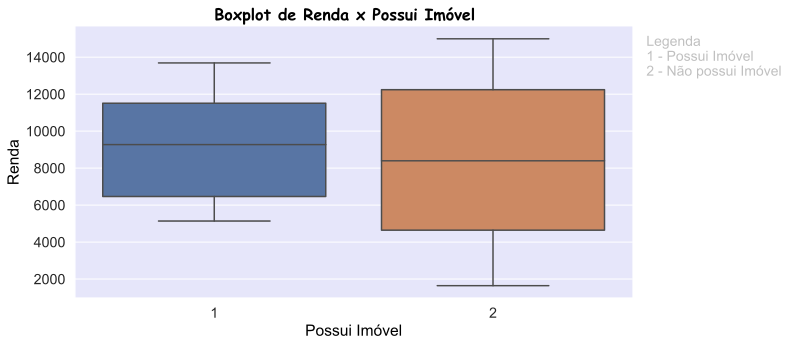

In [34]:
plt.figure(figsize=(10,5),
           facecolor='white') # Ajustando a cor

ax = plt.axes()
ax.set_facecolor('#E6E6FA') #Cor de fundo do gráfico
ax.spines['right'].set_visible(False) # Remover grids e eixos
ax.spines['top'].set_visible(False) # Remover grids e eixos

sns.boxplot(data=base_dados,x='Possui Imóvel',y='Renda')

# Definindo label do eixo X
plt.xlabel(
        'Possui Imóvel', # Nome do Label
        color = 'Black' # Cor da Fonte
)

# Definindo label do eixo Y
plt.ylabel(
        'Renda',# Nome do Label
        color = 'Black' # Cor da Fonte
)

# Definindo um Titulo
plt.text(
        x = 0,
        y = 16000, # Coordenada para o Titulo
        s = 'Boxplot de Renda x Possui Imóvel', # Texto
        fontsize=16, # Tamanho do Texto
        fontfamily='fantasy', # Tipo da Fonte
        color='Black', # Cor do Texto
        weight='bold' #
)
plt.text(
        x = 1.55,
        y = 13000, # Coordenada para o Titulo
        s = 'Legenda \n'
            '1 - Possui Imóvel\n'
            '2 - Não possui Imóvel',# Texto
        fontsize=14, # Tamanho do Texto
        color='Silver', # Cor do Texto
);

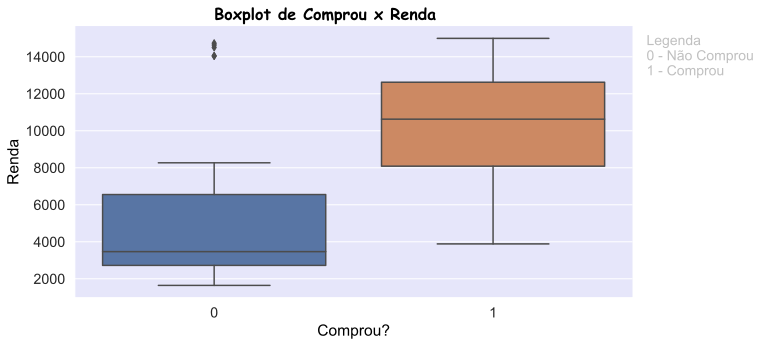

In [35]:
plt.figure(figsize=(10,5),
           facecolor='white') # Ajustando a cor

ax = plt.axes()
ax.set_facecolor('#E6E6FA') #Cor de fundo do gráfico
ax.spines['right'].set_visible(False) # Remover grids e eixos
ax.spines['top'].set_visible(False) # Remover grids e eixos

sns.boxplot(data=base_dados,x='Comprou?',y='Renda')

# Definindo label do eixo X
plt.xlabel(
        'Comprou?', # Nome do Label
        color = 'Black' # Cor da Fonte
)

# Definindo label do eixo Y
plt.ylabel(
        'Renda',# Nome do Label
        color = 'Black' # Cor da Fonte
)

# Definindo um Titulo
plt.text(
        x = 0,
        y = 16000, # Coordenada para o Titulo
        s = 'Boxplot de Comprou x Renda', # Texto
        fontsize=16, # Tamanho do Texto
        fontfamily='fantasy', # Tipo da Fonte
        color='Black', # Cor do Texto
        weight='bold' #
)
plt.text(
        x = 1.55,
        y = 13000, # Coordenada para o Titulo
        s = 'Legenda \n'
            '0 - Não Comprou\n'
            '1 - Comprou',# Texto
        fontsize=14, # Tamanho do Texto
        color='Silver', # Cor do Texto
);

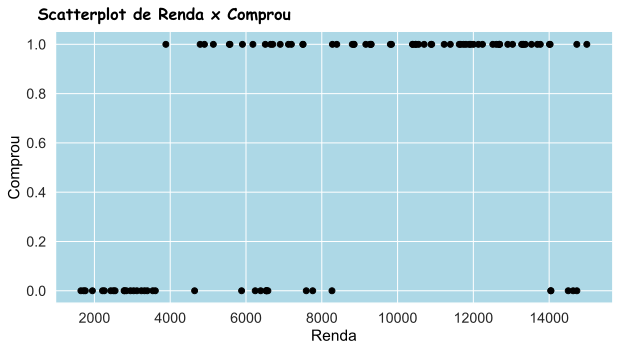

In [60]:
plt.figure(figsize=(10,5),
           facecolor='white') # Ajustando a cor

ax = plt.axes()
ax.set_facecolor('#ADD8E6') #Cor de fundo do gráfico
ax.spines['right'].set_visible(False) # Remover grids e eixos
ax.spines['top'].set_visible(False) # Remover grids e eixos

plt.scatter(data=base_dados,x='Renda',y='Comprou?', color='black')

# Definindo label do eixo X
plt.xlabel(
        'Renda', # Nome do Label
        color = 'Black' # Cor da Fonte
)

# Definindo label do eixo Y
plt.ylabel(
        'Comprou',# Nome do Label
        color = 'Black' # Cor da Fonte
)

# Definindo um Titulo
plt.text(
        x = 500,
        y = 1.1, # Coordenada para o Titulo
        s = 'Scatterplot de Renda x Comprou', # Texto
        fontsize=16, # Tamanho do Texto
        fontfamily='fantasy', # Tipo da Fonte
        color='Black', # Cor do Texto
        weight='bold' #
);

In [62]:
caracteristica = base_dados.iloc[:,1:4].values
previsor=base_dados.iloc[:,4:5].values

In [63]:
from sklearn.model_selection import train_test_split

In [65]:
x_train,x_test,y_train,y_test = train_test_split(caracteristica,
                                                 previsor,
                                                 test_size=0.2,
                                                 random_state=42)

In [67]:
print(len(x_test))
print(len(x_train))

20
80


In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
funcao_logistica = LogisticRegression()

In [70]:
funcao_logistica.fit(x_train,y_train)

C:\Users\Vithep\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [73]:
y_pred = funcao_logistica.predict(x_test)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [75]:
y_test

array([[0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0]], dtype=int64)

In [76]:
from sklearn.metrics import confusion_matrix

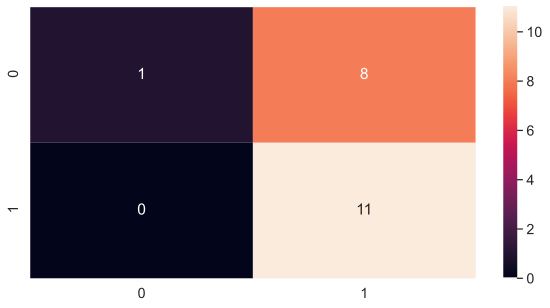

In [81]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True);

In [82]:
from sklearn.metrics import classification_report

In [84]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.11      0.20         9
           1       0.58      1.00      0.73        11

    accuracy                           0.60        20
   macro avg       0.79      0.56      0.47        20
weighted avg       0.77      0.60      0.49        20



#### Teste

In [87]:
salario = 4500
tipo_renda = 1
possui = 1

parametro = [[salario,tipo_renda,possui]]

In [92]:
faz_prev = funcao_logistica.predict(parametro)
prob = funcao_logistica.predict_proba(parametro)

if faz_prev == 0:
    print('Não vai comprar')
    print(prob)
else:
    print('Vai comprar')
    print(prob)

Vai comprar
[[0.40466366 0.59533634]]
